In [1]:
# importing necessary modules.
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
import config9 as cfg

In [2]:
# saving a postgress password and database name to variables to access postgres sql optimal portfolio database.
postgres_password = cfg.password
database_name = 'optimal_portfolio'

In [3]:
# creating a connection to postgres database.
rds_connection_string = f'postgres:{postgres_password}@localhost:5432/{database_name}'
engine = create_engine(f'postgres://{rds_connection_string}')

In [4]:
# checking out the table names in the database.
engine.table_names()

['sandp']

In [5]:
# checking out the SandP_500 table.
sandp = pd.read_sql_query('SELECT * FROM sandp', con=engine)
sandp.head()

,symbol,name,price_to_bookvalue,price_to_book,price_to_sales,price_to_earnings,receivables_turnover,price_to_free_cash_flow,price_to_operating_cash_flow,enterprise_value_multiple,...,inventory_growth,asset_growth,book_value_per_share_growth,debt_growth,randd_expense_growth,sganda_expense_growth,percent_return_on_investment,industry,sector,above_below_sandp_return
0,A,"Agilent Technologies, Inc.",2.55170,5.17165,1.48130,6.30885,7.0014,18.1807,13.57995,16.746223,...,0.0758,0.18005,0.15185,0.31885,-0.0674,0.01880,215.407785,Medical Diagnostics & Research,Healthcare,0
1,AAL,"American Airlines Group, Inc.",-99.00000,-99.00000,0.11565,-99.00000,27.3348,-99.0000,2.20925,61.812855,...,0.0637,-0.00170,-0.06235,0.00975,-99.0000,0.01435,492.976589,Airlines,Industrials,1
2,AAP,"Advance Auto Parts, Inc.",2.95660,3.10380,0.70600,14.16840,57.0461,7.4185,5.46130,0.499984,...,0.0054,0.03670,0.19520,-0.57150,-99.0000,0.10360,158.290852,Retail - Apparel & Specialty,Consumer Cyclical,0
3,AAPL,"Apple, Inc.",5.42765,4.62715,3.98235,19.54495,10.0906,17.3279,15.35960,0.493341,...,0.6019,0.44800,0.44245,-99.00000,0.2694,0.21645,641.441749,Computer Hardware,Technology,1
4,ABBV,"AbbVie, Inc.",16.46870,-99.00000,3.01900,10.48360,-99.0000,9.2123,8.74540,0.001609,...,-99.0000,-99.00000,-99.00000,-99.00000,0.4613,0.14080,127.493713,Drug Manufacturers,Healthcare,0


In [6]:
# converting industry columns into 1's and 0's.
industry = pd.get_dummies(sandp['industry'])

In [7]:
# converting sector columns into 1's and 0's.
sector = pd.get_dummies(sandp['sector'])

In [8]:
# bringing everything together.
sandp = pd.concat([sandp, industry, sector], axis=1)

In [9]:
# dropping industry and sector columns.
sandp.drop(['industry', 'sector'], axis=1, inplace=True)

In [10]:
# dropping the symbol and name columns.
sandp = sandp.drop(columns=['symbol', 'name'])

In [11]:
# dropping percent_return on investment column.
sandp.drop(['percent_return_on_investment'], axis=1, inplace=True)

In [12]:
# looping through the columns to find to be able to view all the column names.
names = []
for x in sandp.columns:
    names.append(x)

In [13]:
# setting an sandp dataframe with just the predictor feature columns to a variable.
X = sandp[['net_income_growth','short_term_coverage_ratio','eps_diluted_growth', 'gross_profit_margin', 'price_to_book', 'price_to_sales', 'price_to_free_cash_flow', 'asset_growth', 'Airlines',
'Computer Hardware','Drug Manufacturers', 'Medical Devices','Application Software', 'Semiconductors','Consumer Packaged Goods', 
'Business Services', 'Credit Services','Utilities - Regulated', 'Insurance - Life', 'REITs','Brokers & Exchanges','Biotechnology',
'Asset Management', 'Online Media','Oil & Gas - E&P','Autos', 'Banks', 'Travel & Leisure', 'Entertainment','Agriculture',
'Transportation & Logistics','Oil & Gas - Integrated','Industrial Distribution','Metals & Mining','Oil & Gas - Services',
'Personal Services','Engineering & Construction', 'Oil & Gas - Midstream','Beverages - Non-Alcoholic', 'Truck Manufacturing', 
'Employment Services', 'Forest Products']]

# setting the above_below_sandp_return column of 0's and 1's that represent if a stock beat the sandp return as a variable, which is the variable we want to predict in our upcoming machine learning module.
target = sandp['above_below_sandp_return']

In [14]:
# splitting the 468 stocks/rows in our sandp dataframe into a training set and a testing set. 
from sklearn.model_selection import train_test_split
X_train, X_test, target_train, target_test = train_test_split(X, target, random_state=76)

In [15]:
# creating a logistic regression model and saving it as a variable called classifier.
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
# fitting/training the logsitic regression model on the training data.
classifier.fit(X_train, target_train)

C:\Users\natha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
# viewing the accuracy of the logistic regression model on the training and testing data.
print(f'Training Data Score: {classifier.score(X_train, target_train)}')
print(f'Testing Data Score: {classifier.score(X_test, target_test)}')

Training Data Score: 0.7150997150997151
Testing Data Score: 0.7521367521367521


In [18]:
# applying the model to the testing data and viewing the results.
predictions = classifier.predict(X_test)
pd.DataFrame({'Prediction': predictions, 'Actual': target_test}).reset_index(drop=True).head()

,Prediction,Actual
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0


In [19]:
# viewing the distribution of the testing data's 0's and 1's.
target_test.value_counts()

0    80
1    37
Name: above_below_sandp_return, dtype: int64

In [20]:
# calculating the mean of the testing data, so we can compare it to the machine learning models accurac. If the accuracy is above the mean, it means we are doing better than just randomly choosing all 1's.
target_test.mean()

0.3162393162393162

In [21]:
# viewing the overal report card of our logistic regression model.
from sklearn.metrics import classification_report
print(classification_report(target_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        80
           1       0.65      0.46      0.54        37

    accuracy                           0.75       117
   macro avg       0.72      0.67      0.69       117
weighted avg       0.74      0.75      0.74       117



In [22]:
# applying our machine learning model on the whole sandp/468 stocks to get a predicted list of 0's and 1's.
predictions2 = classifier.predict(X)
# viewing results.
pd.DataFrame({'Prediction': predictions2, 'Actual': target}).reset_index(drop=True).head()

,Prediction,Actual
0,0,0
1,1,1
2,1,0
3,0,1
4,0,0


In [23]:
# reading in the SandP_500 table from our postgress sql database.
sandp = pd.read_sql_query('SELECT * FROM sandp', con=engine)
sandp.head()

,symbol,name,price_to_bookvalue,price_to_book,price_to_sales,price_to_earnings,receivables_turnover,price_to_free_cash_flow,price_to_operating_cash_flow,enterprise_value_multiple,...,inventory_growth,asset_growth,book_value_per_share_growth,debt_growth,randd_expense_growth,sganda_expense_growth,percent_return_on_investment,industry,sector,above_below_sandp_return
0,A,"Agilent Technologies, Inc.",2.55170,5.17165,1.48130,6.30885,7.0014,18.1807,13.57995,16.746223,...,0.0758,0.18005,0.15185,0.31885,-0.0674,0.01880,215.407785,Medical Diagnostics & Research,Healthcare,0
1,AAL,"American Airlines Group, Inc.",-99.00000,-99.00000,0.11565,-99.00000,27.3348,-99.0000,2.20925,61.812855,...,0.0637,-0.00170,-0.06235,0.00975,-99.0000,0.01435,492.976589,Airlines,Industrials,1
2,AAP,"Advance Auto Parts, Inc.",2.95660,3.10380,0.70600,14.16840,57.0461,7.4185,5.46130,0.499984,...,0.0054,0.03670,0.19520,-0.57150,-99.0000,0.10360,158.290852,Retail - Apparel & Specialty,Consumer Cyclical,0
3,AAPL,"Apple, Inc.",5.42765,4.62715,3.98235,19.54495,10.0906,17.3279,15.35960,0.493341,...,0.6019,0.44800,0.44245,-99.00000,0.2694,0.21645,641.441749,Computer Hardware,Technology,1
4,ABBV,"AbbVie, Inc.",16.46870,-99.00000,3.01900,10.48360,-99.0000,9.2123,8.74540,0.001609,...,-99.0000,-99.00000,-99.00000,-99.00000,0.4613,0.14080,127.493713,Drug Manufacturers,Healthcare,0


In [24]:
# refining the sandp dataframe.
sandp = sandp[['name', 'percent_return_on_investment', 'above_below_sandp_return']]

In [25]:
# viewing the newly refined dataframe.
sandp.head()

,name,percent_return_on_investment,above_below_sandp_return
0,"Agilent Technologies, Inc.",215.407785,0
1,"American Airlines Group, Inc.",492.976589,1
2,"Advance Auto Parts, Inc.",158.290852,0
3,"Apple, Inc.",641.441749,1
4,"AbbVie, Inc.",127.493713,0


In [26]:
# appending the predictions made from applying the logistic regression model to the total 468 sandp stocks to the read in and refined sandp dataframe.
sandp['predictions'] = predictions2

In [27]:
# viewing the results.
sandp.head()

,name,percent_return_on_investment,above_below_sandp_return,predictions
0,"Agilent Technologies, Inc.",215.407785,0,0
1,"American Airlines Group, Inc.",492.976589,1,1
2,"Advance Auto Parts, Inc.",158.290852,0,1
3,"Apple, Inc.",641.441749,1,0
4,"AbbVie, Inc.",127.493713,0,0


In [28]:
# getting a sense of the distribution of our predictions.
sandp['predictions'].value_counts()

0    360
1    108
Name: predictions, dtype: int64

In [92]:
# looping through the predictions columns and appending only the the 1's corresponding returns, stocks predicted to beat the sandp, to a list
r = 0
predicted_positives = []
test =[]
for (x,y, z) in zip(sandp['predictions'],sandp['percent_return_on_investment'], sandp['name']):
    if x == 1:
#         predicted_positives.append(y)
        test.append(z)

        # getting a feel for how many stocks of our predicted 1's actually did beat the sandp return.
        if y > 228:
            r += 1

# viewing the number of stocks that did beat the sandp out of our 105 predicted 1's.            
print(r)

74


In [30]:
# making a dataframe out of the predicted 1's list created above and saving to a variable.
predicted = pd.DataFrame(predicted_positives)
predicted.head()

,0
0,492.976589
1,158.290852
2,258.118955
3,2583.734150
4,363.726903


In [31]:
# observing the length of the dataframe.
len(predicted)

108

In [32]:
# calculating the accuracy of our results, aka the how many of our predicted 1's were actually 1's.
r/len(predicted)

0.6851851851851852

In [33]:
# viewing how many our our predicted 1's were under 0.
for x in predicted[0]:
    if x < 0:
        print(x)

In [34]:
# summing up the predicted column, which is the percent gain of investment over 10 years, and labeling as gain.
gain = predicted[0].sum()
gain

39981.33961082831

In [35]:
# viewing the percent gain.
gain

39981.33961082831

In [36]:
# calculating the percent return, which is gain/profit on investment divided by the cost of the investment, which is the number of stocks in our portfolio, 107.
predicted_portfolio_percent_return = ((gain/100)/len(predicted))*100
predicted_portfolio_percent_return

370.1975889891511

In [37]:
# summing up the sandp percent gain over all 468 stocks.
sandp_gain = sandp['percent_return_on_investment'].sum()
sandp_gain

107456.45476890405

In [38]:
# calculating the percent return of the sandp just like above so we can compare to the results above. Want percent return above to be higher than this one.
sandp_percent_return = ((sandp_gain/100)/len(sandp['percent_return_on_investment']))*100
sandp_percent_return

229.60780933526505

In [39]:
# saving portfolio names and percent returns to lists in order to make bar chart.
portfolio = ['S&P', 'Predicted Portfolio']
percent_returns = [sandp_percent_return, predicted_portfolio_percent_return]

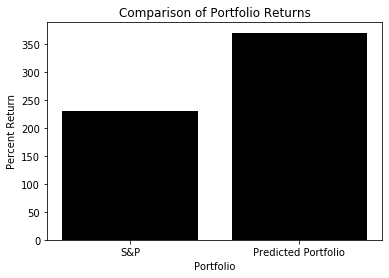

In [44]:
# creating and labeling the bar chart.
plt.bar(portfolio, percent_returns, color='black')
plt.xlabel('Portfolio')
plt.ylabel('Percent Return')
plt.title('Comparison of Portfolio Returns')
plt.savefig('S&P vs Predicted.png')

In [45]:
sandp.head()

,name,percent_return_on_investment,above_below_sandp_return,predictions
0,"Agilent Technologies, Inc.",215.407785,0,0
1,"American Airlines Group, Inc.",492.976589,1,1
2,"Advance Auto Parts, Inc.",158.290852,0,1
3,"Apple, Inc.",641.441749,1,0
4,"AbbVie, Inc.",127.493713,0,0


In [46]:
# creating a list of the 468 stocks returns to perform a random selection of 108 of them.
returns_list = list(sandp['percent_return_on_investment'])

In [47]:
# importing module that will allow me to find random numbers from the above list.
import random

# finding 108 random returns and saving 10 samples by way of loop and saving to variables. Choosing 108, because that is the number of predicted 1's in the above machine learning module on all 468 stocks.
samples_list = []
for x in range(0,10):
    sample = random.choices(returns_list, k=108)
    samples_list.append(sample)

In [48]:
# verifying above process worked.
len(samples_list)

10

In [49]:
# creating an empty dataframe to append things to.
sample_df = pd.DataFrame()

# looping through the samples list and creating a dataframe out of all the random samples.
for (x,i) in zip(samples_list, range(0,10)):
    sample_df[i] = x

# viewing the results.
sample_df.head()

,0,1,2,3,4,5,6,7,8,9
0,641.441749,161.940564,12.214322,138.045466,469.825828,399.456686,437.674063,82.046834,11.009882,253.377735
1,334.152334,39.580974,11.009882,104.254647,16.093672,387.878788,475.514531,25.052265,1001.671388,119.637182
2,331.358123,298.394592,184.901648,53.257576,38.193253,204.523810,92.675960,-12.355527,124.444444,354.006900
3,144.899479,215.349186,135.121731,246.609146,333.407821,10.848508,142.881944,149.954393,629.663723,150.815655
4,354.006900,332.219251,243.698011,130.657359,-72.333685,16.093672,72.501772,249.760766,100.858261,127.879320


In [50]:
# creating empty list to append summed returns too and dividing by 100 to take out of percent form by way of loop.
sums = []
for column in range(0,10):
    sums.append((sample_df[column].sum())/100)

In [51]:
# viewing process worked.
sums

[285.4846477083857,
 268.09022611314566,
 256.16215954343295,
 242.6520878604228,
 195.79399715541436,
 243.11740773357215,
 248.9879607086266,
 211.67845782092033,
 279.4658851121836,
 247.61609070891063]

In [52]:
# importing module that lets me bring in saved machine learning module.
import joblib

# loading the saved knn machine learning module.
filename = 'finalized_model.sav'
knn_model = joblib.load(filename)

# using the knn machine learning model to make predictions.
knn_predictions = knn_model.predict(X)

In [53]:
# appending the knn predictions to the sandp dataframe.
sandp['knn_predictions'] = knn_predictions

# viewing the results.
sandp.head()

,name,percent_return_on_investment,above_below_sandp_return,predictions,knn_predictions
0,"Agilent Technologies, Inc.",215.407785,0,0,1
1,"American Airlines Group, Inc.",492.976589,1,1,0
2,"Advance Auto Parts, Inc.",158.290852,0,1,1
3,"Apple, Inc.",641.441749,1,0,0
4,"AbbVie, Inc.",127.493713,0,0,0


In [54]:
# sorting out the predicted knn's with for loop and empty list.
knn_predicted_positives = []
for (x,y) in zip(sandp['knn_predictions'],sandp['percent_return_on_investment']):
    if x == 1:
        knn_predicted_positives.append(y)

In [55]:
# making a dataframe out of the knn predicted 1's list created above and saving to a variable.
knn_predicted = pd.DataFrame(knn_predicted_positives)
knn_predicted.head()

,0
0,215.407785
1,158.290852
2,258.118955
3,363.726903
4,750.511115


In [56]:
# summing up the predicted column, which is the percent gain of investment over 10 years, and labeling as gain.
knn_gain = knn_predicted[0].sum()
knn_gain

24795.857657024084

In [57]:
# calculating the percent return, which is gain/profit on investment divided by the cost of the investment, which is the number of stocks in our portfolio, 107.
knn_predicted_portfolio_percent_return = ((knn_gain/100)/len(knn_predicted))*100
knn_predicted_portfolio_percent_return

288.32392624446607

In [58]:
# creating list to append final percent return on investment to for the 10 randomly selected stock returns.
total_returns = [predicted_portfolio_percent_return, knn_predicted_portfolio_percent_return, sandp_percent_return]
for x in sums:
    total_returns.append((x/108)*100)

In [59]:
# creating list of portfolio names/
row_names = ['logistic', 'knn','sandp','trial1','trial2','trial3','trial4','trial5','trial6','trial7','trial8','trial9','trial10']

# creating a dataframe of the portfolio names.
returns = pd.DataFrame(row_names, columns=['portfolio'])


# adding the returns to the dataframe.
returns['% returns'] = total_returns


# previewing results.
returns.head()

,portfolio,% returns
0,logistic,370.197589
1,knn,288.323926
2,sandp,229.607809
3,trial1,264.337637
4,trial2,248.231691


In [60]:
# sorting the dataframe from greatest to least by returns.
returns1 = returns.sort_values('% returns', ascending=False)

# verifying results.
returns1.head()

,portfolio,% returns
0,logistic,370.197589
1,knn,288.323926
3,trial1,264.337637
11,trial9,258.764708
4,trial2,248.231691


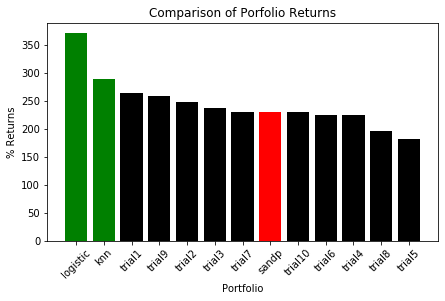

In [65]:
# making a barchart to compare the returns.
plt.figure(figsize=(7,4))
colors = ['g', 'g', 'black','black','black', 'black', 'black', 'r', 'black','black','black','black','black']
plt.bar(returns1['portfolio'], returns1['% returns'], color=colors)
plt.xticks(rotation=45)
plt.xlabel('Portfolio')
plt.ylabel('% Returns')
plt.title('Comparison of Porfolio Returns')
# plt.savefig('returns.png')

In [66]:
# creating a connection to postgres optimal_portfolio19 database.
rds_connection_string = f'postgres:{postgres_password}@localhost:5432/optimal_portfolio19'
engine = create_engine(f'postgres://{rds_connection_string}')

In [67]:
# reading in the optimal_portfolio19 database.
sandp19 = pd.read_sql_query('SELECT * FROM sandp19', con=engine)

# viewing the results.
sandp19.head()

,symbol,name,price_to_bookvalue,price_to_book,price_to_sales,price_to_earnings,receivables_turnover,price_to_free_cash_flow,price_to_operating_cash_flow,enterprise_value_multiple,...,three_year_dividend_growth_per_share,receivables_growh,inventory_growth,asset_growth,book_value_per_share_growth,debt_growth,randd_expense_growth,sganda_expense_growth,industry,sector
0,A,"Agilent Technologies, Inc.",4.52285,15.21880,4.54935,49.10090,6.57635,26.77630,21.81385,21.977547,...,-0.33325,0.10960,0.09420,0.04735,0.05050,-0.02460,0.08305,0.04940,Medical Diagnostics & Research,Healthcare
1,AAL,"American Airlines Group, Inc.",-99.00000,-99.00000,0.46345,15.39385,25.61875,7.43180,4.76540,8.055577,...,0.12995,0.03640,0.18105,0.08860,-0.22415,0.19360,-99.00000,0.05905,Airlines,Industrials
2,AAP,"Advance Auto Parts, Inc.",2.76620,5.00915,1.01720,21.92895,15.29405,18.65350,13.60055,13.648477,...,-99.00000,-0.01185,0.00510,0.04295,0.10400,0.00130,-99.00000,0.02095,Retail - Apparel & Specialty,Consumer Cyclical
3,AAPL,"Apple, Inc.",10.64980,10.64980,4.01155,18.81675,5.88140,17.56185,14.38080,8.253489,...,0.11195,0.15415,-0.07365,-0.05000,-0.12605,-0.03325,0.18425,0.09340,Computer Hardware,Technology
4,ABBV,"AbbVie, Inc.",15.40735,-99.00000,4.90090,27.42550,5.99340,13.88110,13.05080,20.321289,...,0.18330,0.06380,0.05575,-0.04530,-1.29920,0.04650,0.60235,0.12290,Drug Manufacturers,Healthcare


In [68]:
# converting industry columns into 1's and 0's.
industry = pd.get_dummies(sandp19['industry'])

In [69]:
# bringing industry dummies with sandp19 database.
sandp19 = pd.concat([sandp19, industry], axis=1)

In [70]:
# creating a dataframe with only valuable predictor features and setting to variable for prediction purposes.
X0 = sandp19[['net_income_growth','short_term_coverage_ratio','eps_diluted_growth', 'gross_profit_margin', 'price_to_book', 'price_to_sales', 'price_to_free_cash_flow', 'asset_growth', 'Airlines',
'Computer Hardware','Drug Manufacturers', 'Medical Devices','Application Software', 'Semiconductors','Consumer Packaged Goods', 
'Business Services', 'Credit Services','Utilities - Regulated', 'Insurance - Life', 'REITs','Brokers & Exchanges','Biotechnology',
'Asset Management', 'Online Media','Oil & Gas - E&P','Autos', 'Banks', 'Travel & Leisure', 'Entertainment','Agriculture',
'Transportation & Logistics','Oil & Gas - Integrated','Industrial Distribution','Metals & Mining','Oil & Gas - Services',
'Personal Services','Engineering & Construction', 'Oil & Gas - Midstream','Beverages - Non-Alcoholic', 'Truck Manufacturing', 
'Employment Services', 'Forest Products']]

In [71]:
# applying our machine learning module trained and tested above on this new 2019/2018 data to make new portfolio for next 10 years.
prediction3 = classifier.predict(X0)

In [72]:
# adding the predictions array to the sandp19 dataframe.
sandp19['predictions'] = prediction3

In [73]:
# verifying above code worked.
sandp19.head()

,symbol,name,price_to_bookvalue,price_to_book,price_to_sales,price_to_earnings,receivables_turnover,price_to_free_cash_flow,price_to_operating_cash_flow,enterprise_value_multiple,...,Steel,Tobacco Products,Transportation & Logistics,Travel & Leisure,Truck Manufacturing,Utilities - Independent Power Producers,Utilities - Regulated,Utilities—Regulated Electric,Waste Management,predictions
0,A,"Agilent Technologies, Inc.",4.52285,15.21880,4.54935,49.10090,6.57635,26.77630,21.81385,21.977547,...,0,0,0,0,0,0,0,0,0,0
1,AAL,"American Airlines Group, Inc.",-99.00000,-99.00000,0.46345,15.39385,25.61875,7.43180,4.76540,8.055577,...,0,0,0,0,0,0,0,0,0,1
2,AAP,"Advance Auto Parts, Inc.",2.76620,5.00915,1.01720,21.92895,15.29405,18.65350,13.60055,13.648477,...,0,0,0,0,0,0,0,0,0,0
3,AAPL,"Apple, Inc.",10.64980,10.64980,4.01155,18.81675,5.88140,17.56185,14.38080,8.253489,...,0,0,0,0,0,0,0,0,0,0
4,ABBV,"AbbVie, Inc.",15.40735,-99.00000,4.90090,27.42550,5.99340,13.88110,13.05080,20.321289,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# creating two empty lists to append values to.
optimal_portfolio_ticker = []
optimal_portfolio_name = []

not_op_ticker = []
not_op_name = []

# looping through the predictions column and appending all the symbols and names with a 1 in its predictions column. 1 represents beating the sandp return.
for (p,x,y) in zip(sandp19['predictions'], sandp19['symbol'], sandp19['name']):
    if p == 1:
        optimal_portfolio_ticker.append(x)
        optimal_portfolio_name.append(y)
    
    elif p == 0:
        not_op_ticker.append(x)
        not_op_name.append(y)

In [75]:
len(optimal_portfolio_name)

111

In [76]:
# creating a dataframe out of the predicted success's names and symbols.
portfolio19 = pd.DataFrame(optimal_portfolio_name, optimal_portfolio_ticker)

In [79]:
# viewing the results.
portfolio19.head()

,0
AAL,"American Airlines Group, Inc."
ACN,Accenture Plc
ADBE,"Adobe, Inc."
ADI,"Analog Devices, Inc."
ADM,Archer-Daniels-Midland Co.


In [85]:
portfolio19.to_csv('portfolio19.csv')

In [86]:
name = []
for x in portfolio19[0]:
    name.append(x)

In [137]:
h = []
j = []
for x in name:
    if x not in test:
        h.append(x)
    else:
        j.append(x)

In [138]:
"".join(j)

"American Airlines Group, Inc.Accenture PlcAdobe, Inc.Analog Devices, Inc.Automatic Data Processing, Inc.Alliance Data Systems Corp.Autodesk, Inc.Arthur J. Gallagher & Co.Akamai Technologies, Inc.Alaska Air Group, Inc.Applied Materials, Inc.Amazon.com, Inc.ANSYS, Inc.Aon PlcActivision Blizzard, Inc.Broadcom, Inc.American Express Co.Broadridge Financial Solutions, Inc.Cboe Global Markets, Inc.Cadence Design Systems, Inc.Cerner Corp.CME Group, Inc.Capital One Financial Corp.salesforce.com, inc.Cognizant Technology Solutions Corp.Citrix Systems, Inc.Delta Air Lines, Inc.Discover Financial ServicesElectronic Arts, Inc.Equifax, Inc.E*TRADE Financial Corp.Facebook, Inc.F5 Networks, Inc.Fidelity National Information Services, Inc.Fiserv, Inc.FleetCor Technologies, Inc.Fortinet, Inc.Alphabet, Inc.Global Payments, Inc.The Goldman Sachs Group, Inc.International Business Machines Corp.Intercontinental Exchange, Inc.Intel Corp.Intuit, Inc.IPG Photonics Corp.Iron Mountain, Inc.Jack Henry & Associat

In [139]:
len(test)

108

In [99]:
len(name)

111